In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_cred_train.csv')

# Подготовка данных

дубликаты

In [3]:
# проверка на дубликаты
print('Всего', len(df['Loan ID']), 'а должно быть', df['Loan ID'].nunique())

Всего 100514 а должно быть 81999


In [4]:
df = df[df['Loan ID'].notna()].drop_duplicates(['Loan ID'])

In [5]:
len(df)

81999

In [6]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('-'*80)

Loan ID
['14dd8831-6af5-400b-83ec-68e61888a048'
 '4771cc26-131a-45db-b5aa-537ea4ba5342'
 '4eed4e6a-aa2f-4c91-8651-ce984ee8fb26' ...
 'e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7'
 '81ab928b-d1a5-4523-9a3c-271ebb01b4fb'
 'c63916c6-6d46-47a9-949a-51d09af4414f']
--------------------------------------------------------------------------------
Customer ID
['981165ec-3274-42f5-a3b4-d104041a9ca9'
 '2de017a3-2e01-49cb-a581-08169e83be29'
 '5efb2b2b-bf11-4dfd-a572-3761a2694725' ...
 '2ced5f10-bd60-4a11-9134-cadce4e7b0a3'
 '3e45ffda-99fd-4cfc-b8b8-446f4a505f36'
 '1b3014be-5c07-4d41-abe7-44573c375886']
--------------------------------------------------------------------------------
Loan Status
['Fully Paid' 'Charged Off']
--------------------------------------------------------------------------------
Current Loan Amount
[4.4541200e+05 2.6232800e+05 9.9999999e+07 ... 9.0398000e+04 4.8604600e+05
 2.7407600e+05]
--------------------------------------------------------------------------------
Term
['Short T

Current Loan Amount

In [7]:
df['Current Loan Amount'].isnull().sum()

0

(array([72311.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  9688.]),
 array([1.08020000e+04, 1.00097217e+07, 2.00086414e+07, 3.00075611e+07,
        4.00064808e+07, 5.00054005e+07, 6.00043202e+07, 7.00032399e+07,
        8.00021596e+07, 9.00010793e+07, 9.99999990e+07]),
 <BarContainer object of 10 artists>)

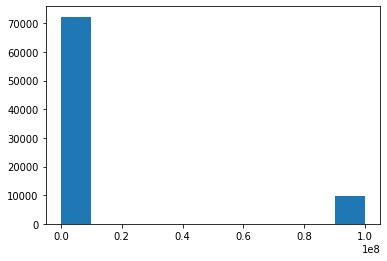

In [8]:
plt.hist(df['Current Loan Amount'])

In [9]:
# замена на медиану
median=df['Current Loan Amount'].median()
quantile95 = df['Current Loan Amount'].quantile(.95)
df['Current Loan Amount']=df['Current Loan Amount'].map(lambda x: median if x>=quantile95 else x)

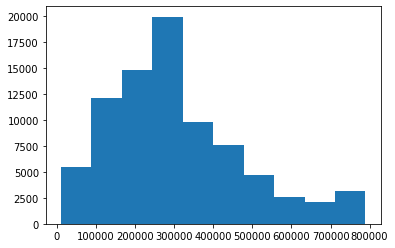

In [10]:
plt.hist(df['Current Loan Amount']);

Years in current job

In [11]:
df["Years in current job"].value_counts()

10+ years    25271
2 years       7560
< 1 year      6755
3 years       6671
5 years       5619
1 year        5317
4 years       5029
6 years       4702
7 years       4566
8 years       3781
9 years       3220
Name: Years in current job, dtype: int64

In [12]:
# поскольку 10+ доминирует - ее и будем ставить
df['Years in current job'].fillna('10+ years', inplace=True)

In [13]:
df['Years in current job'].isnull().sum()

0

In [14]:
df['Years in current job']

0          8 years
1        10+ years
2          8 years
3          3 years
4          5 years
           ...    
99990     < 1 year
99996       1 year
99997      6 years
99998      9 years
99999    10+ years
Name: Years in current job, Length: 81999, dtype: object

Purpose (другое-прочее)

In [15]:
df['Purpose'].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'Take a Trip',
       'Other', 'small_business', 'Medical Bills', 'wedding', 'vacation',
       'Educational Expenses', 'moving', 'renewable_energy'], dtype=object)

In [16]:
df['Purpose']=df['Purpose'].map(lambda x: 'Other' if x=='other' else x)

Monthly Debt

In [17]:
df['Monthly Debt'].isnull().sum()

0

Years of Credit History

In [18]:
df['Years of Credit History'].isnull().sum()

0

Months since last delinquent (nan - не было просроченности, замена на 0)

In [19]:
df['Months since last delinquent'].isnull().sum()

44621

In [20]:
df['Months since last delinquent'] = df['Months since last delinquent'].fillna(0)

Current Credit Balance

In [21]:
df['Current Credit Balance'].isnull().sum()

0

Maximum Open Credit

In [22]:
df['Maximum Open Credit'].isnull().sum()

2

In [23]:
df['Maximum Open Credit'] = df['Maximum Open Credit'].fillna(0)

Tax Liens

In [24]:
df['Tax Liens'].isnull().sum()

8

In [25]:
df['Tax Liens'] = df['Tax Liens'].fillna(0)

Bankruptcies 

In [26]:
df['Bankruptcies'].isnull().sum()

175

In [27]:
df['Bankruptcies'] = df['Bankruptcies'].fillna(0)

## Credit Score и Annual Income(можно поставить средние, а можно попробовать их предсказать)

In [28]:
score=0
index_Credit_Score = []
for row in df['Credit Score']:
    try:
        int(row)
    except ValueError:
        index_Credit_Score.append(score)
    score+=1
   
annual_income = 0
index_Annual_Income = []
for row in df['Annual Income']:
    try:
        int(row)
    except ValueError:
        index_Annual_Income.append(annual_income)
    annual_income+=1

Credit Score

In [29]:
X_train = df[['Credit Score',
              'Current Loan Amount',
              'Monthly Debt',
              'Years of Credit History',
              'Months since last delinquent',
              'Number of Open Accounts',
              'Number of Credit Problems',
              'Maximum Open Credit',
              'Bankruptcies',
              'Tax Liens',
              'Current Credit Balance']]

X_test = X_train.copy().drop(columns=['Credit Score'])

X_train.dropna(inplace=True)

y_train_Credit_Score = X_train['Credit Score']
X_train.drop(columns=['Credit Score'], inplace=True)

<ipython-input-29-d6707f49876f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.dropna(inplace=True)
c:\python38\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
from sklearn import linear_model
from sklearn.linear_model import Ridge

creditreg= linear_model.Ridge()
creditreg.fit(X_train, y_train_Credit_Score)
y_pred_credit=creditreg.predict(X_test)

i=0
for index, row in df.iterrows():
    if(pd.isnull(row['Credit Score'])):
        df.at[index,'Credit Score']=y_pred_credit[i]
        i+=1

Annual Income (аналогично)

In [31]:
X_train = df[['Annual Income',
              'Current Loan Amount',
              'Monthly Debt',
              'Years of Credit History',
              'Months since last delinquent',
              'Number of Open Accounts',
              'Number of Credit Problems',
              'Maximum Open Credit',
              'Bankruptcies',
              'Tax Liens',
              'Current Credit Balance']]

X_test = X_train.copy().drop(columns=['Annual Income'])

X_train.dropna(inplace=True)

y_train_Credit_Score = X_train['Annual Income']
X_train.drop(columns=['Annual Income'], inplace=True)

<ipython-input-31-6a3ad2234c89>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.dropna(inplace=True)
c:\python38\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
creditreg= linear_model.Ridge()
creditreg.fit(X_train, y_train_Credit_Score)
y_pred_credit=creditreg.predict(X_test)

i=0
for index, row in df.iterrows():
    if(pd.isnull(row['Annual Income'])):
        df.at[index,'Annual Income']=y_pred_credit[i]
        i+=1

In [33]:
df.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [34]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.000000,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,1208.518696,1.072021e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,307780.0,Short Term,741.000000,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.000000,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,0.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,1202.671085,1.493858e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,0.0,15.0,0.0,253460.0,427174.0,0.0,0.0


In [39]:
df.to_csv('preprocessed_data.csv', index=False)